# Unit 5 - Financial Planning

In [196]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

import json

# Remove Warning
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [197]:
# Load .env enviroment variables
load_dotenv("API.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [198]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth= 5.3

In [199]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

#### BTC Current Price

In [200]:
# Excute get request for BTC URL and store response
btc_response = requests.get(btc_url)

# Formatting with json
btc_data = btc_response.json()

# Outputting btc_data
print(json.dumps(btc_data, indent = 4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19330093,
            "total_supply": 19330093,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 27210.0,
                    "volume_24h": 18550141991,
                    "market_cap": 525950346148,
                    "percentage_change_1h": 0.125706424081957,
                    "percentage_change_24h": -3.19164478239904,
                    "percentage_change_7d": -3.46400354639006,
                    "percent_change_1h": 0.125706424081957,
                    "percent_change_24h": -3.19164478239904,
                    "percent_change_7d": -3.46400354639006
                },
                "CAD": {
                    "price": 36964.785,
                    "volume_24h": 25200367894.7735,
                    

In [244]:
# Get current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]

#### ETH Current Price

In [245]:
# Fetch current ETH price
eth_response = requests.get(eth_url)

# Formatting with json
eth_data = eth_response.json()

# Outputting eth_data
print(json.dumps(eth_data, indent = 4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120452175,
            "total_supply": 120452175,
            "max_supply": 120452175,
            "quotes": {
                "USD": {
                    "price": 1717.23,
                    "volume_24h": 9739881080,
                    "market_cap": 206770394026,
                    "percentage_change_1h": 0.250421307523328,
                    "percentage_change_24h": -3.62443722228049,
                    "percentage_change_7d": -4.67060846622277,
                    "percent_change_1h": 0.250421307523328,
                    "percent_change_24h": -3.62443722228049,
                    "percent_change_7d": -4.67060846622277
                },
                "CAD": {
                    "price": 2332.856955,
                    "volume_24h": 13231628447.18,
          

In [246]:
# Get current BTC price
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]

In [247]:
# Calculation of my BTC and ETH Value
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Compute current value of my crpto
total_crypto_wallet = my_btc_value + my_eth_value

In [248]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")
print(f"The total value of your cryptocurrency wallet is ${total_crypto_wallet:0.2f} CAD")

The current value of your 1.2 BTC is $44357.74 CAD
The current value of your 5.3 ETH is $12364.14 CAD
The total value of your cryptocurrency wallet is $56721.88 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [206]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [207]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [208]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [209]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today).df

# Preview DataFrame
prices_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


In [210]:
# Reorganize the DataFrame
# Separate ticker data
agg_ticker = prices_df[prices_df["symbol"]=="AGG"].drop("symbol",axis=1)
spy_ticker = prices_df[prices_df["symbol"]=="SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
ticker_df = pd.concat([agg_ticker,spy_ticker],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
ticker_df

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [211]:
# Pick AGG and SPY close prices
agg_close_price = ticker_df["AGG"]["close"][0]
spy_close_price = ticker_df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [212]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
total_share_value = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f} USD")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f} USD")
print(f"The total value of shares is ${total_share_value:0.2f} USD")

The current value of your 200 AGG shares is $23886.00 USD
The current value of your 50 SPY shares is $16728.50 USD
The total value of shares is $40614.50 USD


### Savings Health Analysis

In [213]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data =[total_crypto_wallet, total_share_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, index=["Crypto", "Shares"], columns=["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,56721.883862
Shares,40614.500000


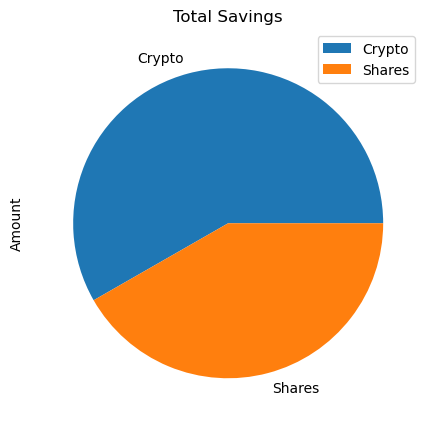

In [214]:
# Plot savings pie chart
df_savings.plot.pie(y = "Amount", title = "Total Savings", figsize=(5,10));

In [215]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(savings_data)

# Validate saving health
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund.")
elif (total_savings == emergency_fund):
    print("congratulations! You have reached this financial goal")
elif (total_savings < emergency_fund):
    difference = emergency_fund - total_savings
    print(f"You are ${difference:0.2f} away from reaching the goal ")       

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [216]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [217]:
# Get 5 years' worth of historical data for SPY and AGG
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
agg_ticker_5y = portfolio_df[portfolio_df["symbol"]=="AGG"].drop("symbol",axis=1)
spy_ticker_5y = portfolio_df[portfolio_df["symbol"]=="SPY"].drop("symbol",axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_ticker_5y,spy_ticker_5y],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [218]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_30y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [219]:
# Printing the simulation input data
monte_carlo_30y.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13520  114.706244    -0.000871  417.44   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.93   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.81   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.32   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.63   

                                                                              \
                             high       low     close     volume trade_count   
timestamp                                                                      
2016-05-02 04:00:00+00:00  208.18  206.4100  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.7200   89131004      340335   
...                           ...       ...       ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.6100   51824860      295870   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.5200   50297139      296300   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.4000   50692781      330049   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.0600   76965583      443396   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.3000   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.508245     0.002088  
2021-04-27 04:00:00+00:00  417.481360    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.824046     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [220]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_carlo_30y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003835,0.999367,0.998883,1.001607,0.983576,1.001738,1.000032,1.000174,0.996939,0.993301,...,1.012847,0.997788,0.997607,1.008189,1.009727,1.000311,1.003617,0.997111,1.005720,0.999706
2,1.003427,0.996001,1.002520,0.994114,0.978280,0.993490,0.997314,0.991585,0.997868,0.998147,...,1.018103,1.000818,1.000162,1.010290,1.018452,1.002334,1.005849,0.990528,1.002975,1.001679
3,1.003857,0.990635,1.005790,0.990580,0.978134,0.995396,0.997835,0.996018,0.997464,1.001918,...,1.018830,1.004741,0.999228,1.009013,1.005815,0.996512,0.998337,0.997061,1.004472,1.002138
4,1.005253,0.994172,1.000108,0.990247,0.981833,0.998113,0.994569,0.998551,0.994258,1.009760,...,1.017730,1.005206,1.000573,1.005989,0.995478,0.996042,0.994396,0.999849,1.004590,1.003851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.480140,3.519934,11.389241,7.663042,9.262454,9.715882,6.841636,9.615963,8.406694,13.340021,...,7.993022,7.573166,4.438546,7.507607,5.738197,5.846010,9.562582,5.561904,3.779253,3.038409
7557,6.497444,3.535465,11.371311,7.622646,9.217624,9.761112,6.801111,9.614823,8.446675,13.396746,...,7.973975,7.569822,4.414533,7.544446,5.726502,5.828995,9.591898,5.558141,3.767134,3.020738
7558,6.529806,3.498465,11.436777,7.697893,9.171696,9.806583,6.884907,9.531145,8.407202,13.397098,...,7.990473,7.627444,4.395279,7.563601,5.696009,5.841545,9.680083,5.567679,3.758830,3.027759
7559,6.492793,3.493831,11.371948,7.739767,9.169658,9.772327,6.875936,9.524378,8.399883,13.416123,...,8.002229,7.658329,4.385447,7.550621,5.643772,5.839503,9.684368,5.548001,3.795961,3.036212


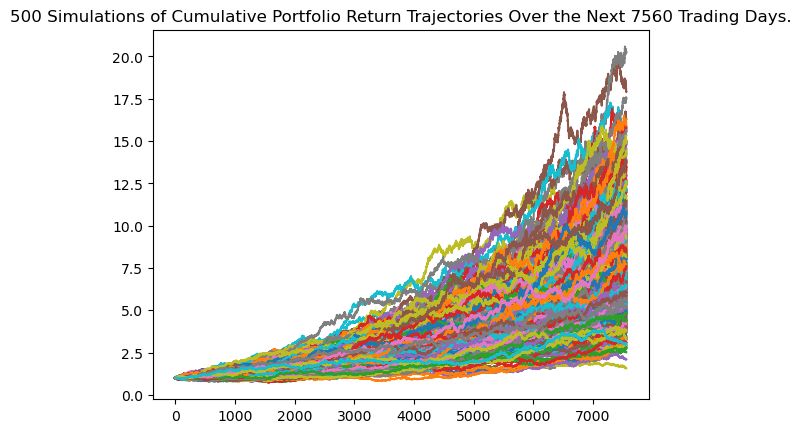

In [221]:
# Plot simulation outcomes
line_plot_30 = monte_carlo_30y.plot_simulation()

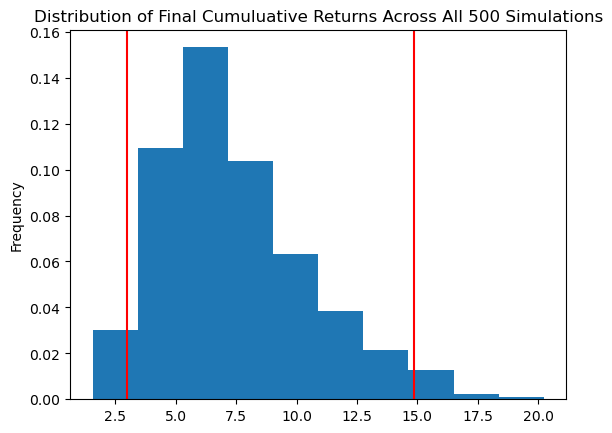

In [222]:
# Plot probability distribution and confidence intervals
dist_plot_30 = monte_carlo_30y.plot_distribution()

### Retirement Analysis

In [223]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_30 = monte_carlo_30y.summarize_cumulative_return()

# Print summary statistics
print(mc_summary_30)

count           500.000000
mean              7.451332
std               3.085048
min               1.570287
25%               5.214436
50%               6.861429
75%               9.131986
max              20.229728
95% CI Lower      2.999645
95% CI Upper     14.873954
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [224]:
# Set initial investment
initial_investment_30 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30 = round(mc_summary[8]* initial_investment_30,2)
ci_upper_30 = round(mc_summary[9]* initial_investment_30,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $58875.65 and $326444.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [225]:
# Set initial investment
initial_investment_30_increase = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30_increase = round(mc_summary[8]* initial_investment_30_increase,2)
ci_upper_30_increase = round(mc_summary[9]* initial_investment_30_increase,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30_increase} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30_increase} and ${ci_upper_30_increase}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88313.48 and $489666.06


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [226]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_5y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252 * 5)

# Printing the simulation input data
monte_carlo_5y.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13520  114.706244    -0.000871  417.44   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.93   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.81   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.32   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.63   

                                                                              \
                             high       low     close     volume trade_count   
timestamp                                                                      
2016-05-02 04:00:00+00:00  208.18  206.4100  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.7200   89131004      340335   
...                           ...       ...       ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.6100   51824860      295870   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.5200   50297139      296300   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.4000   50692781      330049   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.0600   76965583      443396   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.3000   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.508245     0.002088  
2021-04-27 04:00:00+00:00  417.481360    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.824046     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [227]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
monte_carlo_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994738,1.000659,1.001264,0.995634,1.000087,1.000740,0.998342,1.006361,1.006108,0.998296,...,1.006467,1.004281,0.993577,0.998365,0.995258,1.007292,0.998233,1.004438,1.001261,1.001162
2,0.988515,0.993084,0.995551,0.996309,1.000133,0.996715,0.999633,1.004833,1.008766,0.996817,...,1.000838,1.016955,0.991705,1.003651,0.994316,1.010505,0.999983,1.007179,0.993730,0.999109
3,0.988227,0.993634,0.997908,0.998749,1.007029,0.998700,1.002761,1.008297,1.017116,0.993095,...,0.999154,1.028575,0.992121,1.008272,0.995717,1.011324,0.997061,1.000680,1.004680,0.995848
4,0.988705,0.995266,0.996798,0.994435,0.996334,0.990965,1.002457,1.005757,1.008450,0.994150,...,0.999997,1.025854,0.988922,1.004537,0.994583,1.020682,0.992554,0.993979,1.008717,1.001058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.304987,0.981677,1.531464,1.236581,1.125034,1.737752,1.777939,1.118132,1.610615,1.445841,...,1.469149,1.664788,1.275701,1.211763,1.236379,1.512440,1.232307,1.773428,0.988643,1.231347
1257,1.307984,0.987396,1.524052,1.245458,1.122571,1.746856,1.782996,1.109881,1.594331,1.441474,...,1.480322,1.656567,1.271869,1.206221,1.245929,1.509998,1.232211,1.772682,0.991148,1.235588
1258,1.300781,0.987000,1.512518,1.244237,1.123209,1.745561,1.779122,1.121298,1.601163,1.453216,...,1.483045,1.656739,1.276136,1.209633,1.243617,1.506021,1.227181,1.781134,0.991850,1.240696
1259,1.305691,0.993723,1.498811,1.242042,1.127891,1.749781,1.777411,1.122455,1.603107,1.457397,...,1.487909,1.652878,1.284298,1.210026,1.246944,1.495895,1.226321,1.785736,0.990286,1.250212


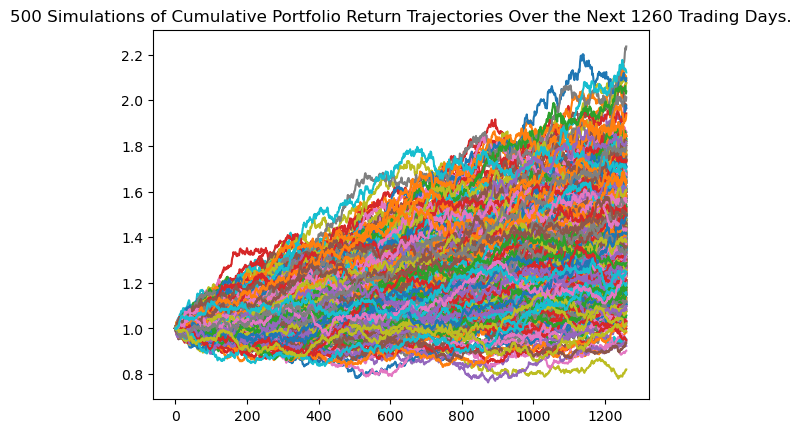

In [228]:
# Plot simulation outcomes
line_plot_5 = monte_carlo_5y.plot_simulation()

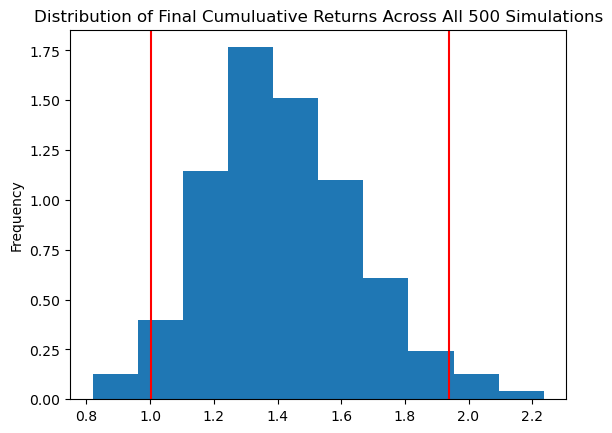

In [229]:
# Plot probability distribution and confidence intervals
dist_plot_5 = monte_carlo_5y.plot_distribution()

In [230]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_5 = monte_carlo_5y.summarize_cumulative_return()

# Print summary statistics
print(mc_summary_5)

count           500.000000
mean              1.417984
std               0.236578
min               0.820028
25%               1.254085
50%               1.393114
75%               1.579292
max               2.236090
95% CI Lower      1.003921
95% CI Upper      1.938837
Name: 1260, dtype: float64


In [231]:
# Set initial investment
initial_investment_5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5 = round(mc_summary[8]* initial_investment_5,2)
ci_upper_5 = round(mc_summary[9]* initial_investment_5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5} and ${ci_upper_5}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $176626.96 and $979332.12


### Ten Years Retirement Option

In [232]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_10y = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10)

In [233]:
# Printing the simulation input data
monte_carlo_10y.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3480303   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  6469432   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13520  114.706244    -0.000871  417.44   
2021-04-27 04:00:00+00:00       12720  114.498315    -0.002442  417.93   
2021-04-28 04:00:00+00:00       24303  114.379810     0.000525  417.81   
2021-04-29 04:00:00+00:00       21096  114.250702    -0.000524  420.32   
2021-04-30 04:00:00+00:00       19582  114.456246     0.001049  417.63   

                                                                              \
                             high       low     close     volume trade_count   
timestamp                                                                      
2016-05-02 04:00:00+00:00  208.18  206.4100  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.4200  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.7200   89131004      340335   
...                           ...       ...       ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.6100   51824860      295870   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.5200   50297139      296300   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.4000   50692781      330049   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.0600   76965583      443396   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.3000   84731942      478844   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.508245     0.002088  
2021-04-27 04:00:00+00:00  417.481360    -0.000216  
2021-04-28 04:00:00+00:00  417.742098    -0.000287  
2021-04-29 04:00:00+00:00  418.824046     0.006373  
2021-04-30 04:00:00+00:00  417.651995    -0.006570  

[1259 rows x 16 columns]

In [234]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003818,0.999531,1.000180,0.999960,0.999660,0.998331,1.003423,1.002670,0.998160,0.998462,...,1.004034,0.997218,1.002663,0.995024,0.996781,1.004961,0.998887,0.997423,1.001314,0.996331
2,1.004903,1.002014,0.995115,0.996747,1.000320,0.998856,1.002036,1.001772,0.994964,1.000391,...,1.001913,0.997047,0.999278,0.993647,0.996789,1.005916,0.999487,0.999670,1.002170,0.996857
3,1.005533,0.999188,0.992053,0.998101,0.997756,0.998473,1.002779,0.999036,0.993252,0.999747,...,1.001695,0.993402,0.998781,0.996955,0.999627,1.006220,1.000459,1.005167,1.005519,0.999977
4,1.010281,0.995277,0.991710,1.001524,0.998264,0.997735,1.001066,1.001704,0.994739,1.002450,...,0.997624,0.997669,0.994627,0.994786,1.003348,1.003729,0.998834,1.008242,1.003603,1.005139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.316700,1.456123,1.495545,1.672359,1.203289,1.212039,1.660144,1.940872,1.084990,1.432430,...,1.438155,1.506083,1.488420,1.540848,1.461558,1.888357,1.725144,2.081660,1.217429,1.484023
2517,1.313982,1.451746,1.495254,1.671016,1.200137,1.219202,1.666419,1.940587,1.082220,1.439191,...,1.440902,1.506416,1.487967,1.536431,1.465180,1.887684,1.730002,2.093729,1.214605,1.481042
2518,1.319978,1.448971,1.496771,1.672855,1.209415,1.220415,1.676110,1.943695,1.086155,1.439905,...,1.439978,1.498561,1.492946,1.538404,1.468851,1.891556,1.730009,2.096588,1.212087,1.473412
2519,1.317045,1.446412,1.494470,1.674246,1.206195,1.221569,1.689560,1.944429,1.089852,1.443600,...,1.440428,1.500882,1.495845,1.543054,1.472323,1.885723,1.732021,2.095454,1.213434,1.471575


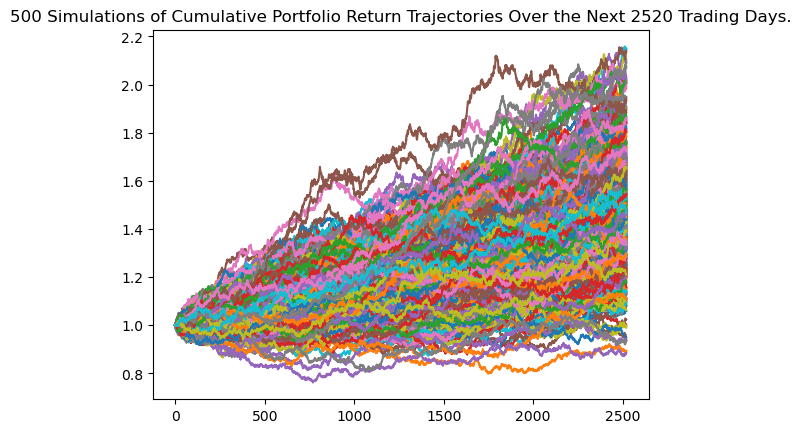

In [235]:
# Plot simulation outcomes
line_plot_10 = monte_carlo_10y.plot_simulation()

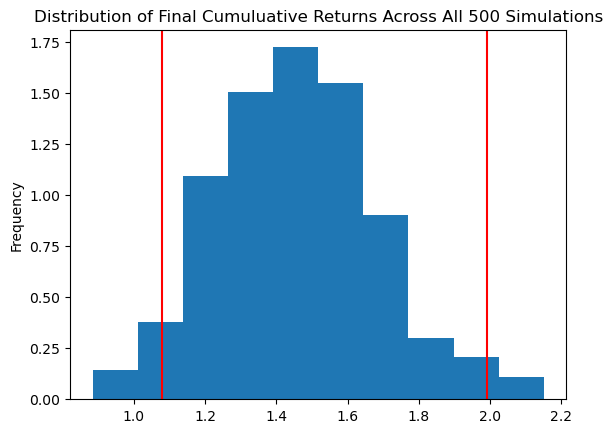

In [236]:
# Plot probability distribution and confidence intervals
dist_plot_10 = monte_carlo_10y.plot_distribution()

In [237]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_10 = monte_carlo_10y.summarize_cumulative_return()

# Print summary statistics
print(mc_summary_10)

count           500.000000
mean              1.460709
std               0.223974
min               0.885258
25%               1.299781
50%               1.452729
75%               1.596712
max               2.150343
95% CI Lower      1.080423
95% CI Upper      1.991581
Name: 2520, dtype: float64


In [238]:
# Set initial investment
initial_investment_10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10 = round(mc_summary[8]* initial_investment_10,2)
ci_upper_10 = round(mc_summary[9]* initial_investment_10,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_10} and ${ci_upper_10}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $176626.96 and $979332.12
